In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from konlpy.tag import Hannanum


def naver_news(keyword, starting_date, ending_date):

    a = ''

    for x in range(10):
        url = r'https://search.naver.com/search.naver?&where=news&query={}&sm=tab_pge&sort=1&photo=0&field=0&reporter_article=&pd=3&ds={}&de={}&docid=&nso=so:r,p:from20201126to20201126,a:all&mynews=0&cluster_rank=18&start={}&refresh_start=0'.format(keyword, starting_date, ending_date, 10*(x)+1)  
        resp = requests.get(url)
        soup = BeautifulSoup(resp.text, 'lxml')
        article_title = soup.find_all('a', class_ = 'news_tit')
        
        for i in article_title:
            a += i.get_text()
    print("Imported words on {}!".format(starting_date))
    return a



def function(date):
    date_str = str(date.date())
    date_str = date_str.replace('-', '.')
    empty_df = pd.DataFrame()

    most_word_list = ['아이폰', '아이폰12', '아이폰SE', '아이폰11', '아이폰X','아이폰XR', '아이폰XS', '아이폰8'] #아이폰 = iphone

    for x in range((date-datetime(date.year, date.month , 1)).days):
        result_ = naver_news('애플', date_str, date_str) # 애플 = Apple
        hannanum = Hannanum()
        result_list = hannanum.nouns(result_)
        word_list = pd.Series(result_list)
        result_ = word_list.value_counts().head(500)
        
        date_str = date_str.replace('.', '-')
        a = pd.DataFrame(result_)
        a = a.transpose()
        a['Date'] = date_str
        a = a.set_index('Date')

        count = 0

        
        for y in range(len(a.columns)):
            for x in range(len(most_word_list)):
                if(a.columns[y] == most_word_list[x]):
                    count += a[most_word_list[x]][0]
                    
        
        dict_1 = {'아이폰': [count]}            
        b = pd.DataFrame(dict_1)
        b['Date'] = date_str
        b = b.set_index('Date')
        print(b)
        b.columns[0]
        empty_df = pd.concat([empty_df, b])

        date_str = date_str.replace('-', '.')
        date_int = int(date_str.replace('.', '')) - 1
        date_str = str(date_int)
        date_str = date_str[:4]+'.'+date_str[4:6]+'.'+date_str[6:8]


    return empty_df

empty_df2 = pd.DataFrame()

end = datetime(2019, 12, 31)
start = datetime(2018, 1, 1)

date = end


for x in range((end.year - start.year)*12 + end.month-start.month+1):
    empty_df2 =  pd.concat([empty_df2, function(date)])
    if(date.month == 11 or date.month == 9 or date.month == 8 or date.month == 6 or date.month == 4 or date.month == 2):
        date = datetime(date.year, date.month-1, 30)
    elif(date.month == 12 or date.month == 10 or date.month == 7 or date.month == 5):
        date = datetime(date.year, date.month-1, 29)
    elif(date.month == 3):
        date = datetime(date.year, date.month-1, 28)
    elif(date.month == 1):
        date = datetime(date.year-1, 12, 30)
    
empty_df2

Imported words on 2019.12.31!
            아이폰
Date           
2019-12-31    1
Imported words on 2019.12.30!
            아이폰
Date           
2019-12-30    2
Imported words on 2019.12.29!
            아이폰
Date           
2019-12-29    0
Imported words on 2019.12.28!
            아이폰
Date           
2019-12-28    5
Imported words on 2019.12.27!
            아이폰
Date           
2019-12-27    2
Imported words on 2019.12.26!
            아이폰
Date           
2019-12-26    2
Imported words on 2019.12.25!
            아이폰
Date           
2019-12-25    2
Imported words on 2019.12.24!
            아이폰
Date           
2019-12-24    2
Imported words on 2019.12.23!
            아이폰
Date           
2019-12-23    3
Imported words on 2019.12.22!
            아이폰
Date           
2019-12-22    4
Imported words on 2019.12.21!
            아이폰
Date           
2019-12-21    7
Imported words on 2019.12.20!
            아이폰
Date           
2019-12-20    1
Imported words on 2019.12.19!
            아이폰
Date           
20

            아이폰
Date           
2019-09-11   21
Imported words on 2019.09.10!
            아이폰
Date           
2019-09-10    6
Imported words on 2019.09.09!
            아이폰
Date           
2019-09-09    2
Imported words on 2019.09.08!
            아이폰
Date           
2019-09-08    1
Imported words on 2019.09.07!
            아이폰
Date           
2019-09-07    4
Imported words on 2019.09.06!
            아이폰
Date           
2019-09-06    1
Imported words on 2019.09.05!
            아이폰
Date           
2019-09-05    1
Imported words on 2019.09.04!
            아이폰
Date           
2019-09-04    2
Imported words on 2019.09.03!
            아이폰
Date           
2019-09-03    0
Imported words on 2019.09.02!
            아이폰
Date           
2019-09-02    5
Imported words on 2019.08.30!
            아이폰
Date           
2019-08-30    7
Imported words on 2019.08.29!
            아이폰
Date           
2019-08-29    0
Imported words on 2019.08.28!
            아이폰
Date           
2019-08-28    4
Imported words o

Imported words on 2019.05.20!
            아이폰
Date           
2019-05-20   11
Imported words on 2019.05.19!
            아이폰
Date           
2019-05-19    0
Imported words on 2019.05.18!
            아이폰
Date           
2019-05-18    1
Imported words on 2019.05.17!
            아이폰
Date           
2019-05-17    0
Imported words on 2019.05.16!
            아이폰
Date           
2019-05-16    0
Imported words on 2019.05.15!
            아이폰
Date           
2019-05-15    7
Imported words on 2019.05.14!
            아이폰
Date           
2019-05-14    0
Imported words on 2019.05.13!
            아이폰
Date           
2019-05-13    2
Imported words on 2019.05.12!
            아이폰
Date           
2019-05-12    0
Imported words on 2019.05.11!
            아이폰
Date           
2019-05-11    5
Imported words on 2019.05.10!
            아이폰
Date           
2019-05-10    1
Imported words on 2019.05.09!
            아이폰
Date           
2019-05-09    0
Imported words on 2019.05.08!
            아이폰
Date           
20

            아이폰
Date           
2019-01-28    4
Imported words on 2019.01.27!
            아이폰
Date           
2019-01-27    3
Imported words on 2019.01.26!
            아이폰
Date           
2019-01-26    4
Imported words on 2019.01.25!
            아이폰
Date           
2019-01-25    3
Imported words on 2019.01.24!
            아이폰
Date           
2019-01-24    3
Imported words on 2019.01.23!
            아이폰
Date           
2019-01-23    5
Imported words on 2019.01.22!
            아이폰
Date           
2019-01-22    1
Imported words on 2019.01.21!
            아이폰
Date           
2019-01-21    0
Imported words on 2019.01.20!
            아이폰
Date           
2019-01-20    3
Imported words on 2019.01.19!
            아이폰
Date           
2019-01-19    3
Imported words on 2019.01.18!
            아이폰
Date           
2019-01-18    2
Imported words on 2019.01.17!
            아이폰
Date           
2019-01-17    1
Imported words on 2019.01.16!
            아이폰
Date           
2019-01-16    2
Imported words o

Imported words on 2018.10.08!
            아이폰
Date           
2018-10-08    0
Imported words on 2018.10.07!
            아이폰
Date           
2018-10-07    4
Imported words on 2018.10.06!
            아이폰
Date           
2018-10-06    5
Imported words on 2018.10.05!
            아이폰
Date           
2018-10-05    2
Imported words on 2018.10.04!
            아이폰
Date           
2018-10-04    2
Imported words on 2018.10.03!
            아이폰
Date           
2018-10-03    2
Imported words on 2018.10.02!
            아이폰
Date           
2018-10-02    6
Imported words on 2018.09.29!
            아이폰
Date           
2018-09-29    7
Imported words on 2018.09.28!
            아이폰
Date           
2018-09-28    2
Imported words on 2018.09.27!
            아이폰
Date           
2018-09-27    5
Imported words on 2018.09.26!
            아이폰
Date           
2018-09-26    7
Imported words on 2018.09.25!
            아이폰
Date           
2018-09-25    3
Imported words on 2018.09.24!
            아이폰
Date           
20

            아이폰
Date           
2018-06-17    3
Imported words on 2018.06.16!
            아이폰
Date           
2018-06-16    4
Imported words on 2018.06.15!
            아이폰
Date           
2018-06-15    1
Imported words on 2018.06.14!
            아이폰
Date           
2018-06-14    5
Imported words on 2018.06.13!
            아이폰
Date           
2018-06-13    7
Imported words on 2018.06.12!
            아이폰
Date           
2018-06-12    6
Imported words on 2018.06.11!
            아이폰
Date           
2018-06-11    7
Imported words on 2018.06.10!
            아이폰
Date           
2018-06-10    5
Imported words on 2018.06.09!
            아이폰
Date           
2018-06-09   17
Imported words on 2018.06.08!
            아이폰
Date           
2018-06-08    5
Imported words on 2018.06.07!
            아이폰
Date           
2018-06-07    2
Imported words on 2018.06.06!
            아이폰
Date           
2018-06-06    0
Imported words on 2018.06.05!
            아이폰
Date           
2018-06-05    2
Imported words o

Imported words on 2018.02.24!
            아이폰
Date           
2018-02-24    2
Imported words on 2018.02.23!
            아이폰
Date           
2018-02-23    1
Imported words on 2018.02.22!
            아이폰
Date           
2018-02-22    2
Imported words on 2018.02.21!
            아이폰
Date           
2018-02-21    2
Imported words on 2018.02.20!
            아이폰
Date           
2018-02-20    3
Imported words on 2018.02.19!
            아이폰
Date           
2018-02-19    7
Imported words on 2018.02.18!
            아이폰
Date           
2018-02-18    1
Imported words on 2018.02.17!
            아이폰
Date           
2018-02-17    0
Imported words on 2018.02.16!
            아이폰
Date           
2018-02-16    4
Imported words on 2018.02.15!
            아이폰
Date           
2018-02-15    2
Imported words on 2018.02.14!
            아이폰
Date           
2018-02-14    1
Imported words on 2018.02.13!
            아이폰
Date           
2018-02-13    0
Imported words on 2018.02.12!
            아이폰
Date           
20

,아이폰
Date,
2019-12-31,1
2019-12-30,2
2019-12-29,0
2019-12-28,5
2019-12-27,2
...,...
2018-01-06,2
2018-01-05,4
2018-01-04,3


In [2]:
empty_df2

,아이폰
Date,
2019-12-31,1
2019-12-30,2
2019-12-29,0
2019-12-28,5
2019-12-27,2
...,...
2018-01-06,2
2018-01-05,4
2018-01-04,3


In [3]:
AAPL = pd.read_excel(r'C:\Users\jylee\Desktop\쥬피터노트북저장\AAPL.xlsx')
AAPL.rename(columns = {'Unnamed: 0':'날짜','AAPL':'Price'}, inplace = True)
#df.rename(columns = {'old_nm' : 'new_nm'), inplace = True)
#Unnamed:0
date_list=[]
dict_ = {}
for x in range(len(AAPL['날짜'])):
    b = (len(AAPL['날짜'])-1) - x
    a = AAPL['날짜'][b]
    a = str(a)[:10]
    date_list.append(a)
    
#dict_ = {'Date':date_list}
#date_list = pd.DataFrame(dict_)
    
difference = []
for i in range(len(AAPL)-1):
    difference.append(round(AAPL['Price'][i+1]-AAPL['Price'][i],2))


difference.reverse()
dict_ = {'Date':date_list[:-1], 'Price':difference}
dict_ = pd.DataFrame(dict_)
dict_ = dict_.set_index('Date')
dict_ = dict_[231:]
dict_

,Price
Date,
2020-01-24,-0.23
2020-01-23,0.38
2020-01-22,0.29
2020-01-21,-0.54
2020-01-17,0.87
...,...
2019-02-11,-0.24
2019-02-08,-0.14
2019-02-07,-0.82


In [4]:
difference

[3.65,
 1.57,
 -2.04,
 0.89,
 -0.07,
 6.1,
 -0.63,
 -0.83,
 1.46,
 -2.6,
 0.63,
 1.5,
 -0.69,
 -0.14,
 0.36,
 3.67,
 2.46,
 0.56,
 0.86,
 1.32,
 -3.49,
 -1.3,
 0.61,
 -1.36,
 -0.91,
 1.04,
 0.05,
 -0.28,
 3.52,
 -0.35,
 -2.37,
 -0.34,
 4.08,
 4.51,
 1.67,
 -0.09,
 -6.46,
 4.12,
 -5.4,
 1.55,
 0.01,
 -0.71,
 -1.12,
 -0.64,
 1.53,
 -3.04,
 -1.69,
 -0.48,
 0.09,
 -3.3,
 7.43,
 2.0,
 -0.11,
 1.92,
 -3.34,
 3.48,
 -3.77,
 0.98,
 1.72,
 -0.87,
 2.68,
 4.06,
 1.1,
 -4.69,
 1.73,
 3.24,
 -3.5,
 -1.79,
 -3.41,
 0.18,
 3.36,
 -1.49,
 -3.83,
 4.5,
 -8.14,
 0.08,
 -10.52,
 -2.78,
 5.14,
 4.23,
 -0.2,
 -1.51,
 1.7,
 -1.04,
 1.49,
 6.09,
 2.57,
 0.15,
 0.95,
 -0.3,
 -0.1,
 2.0,
 3.63,
 -3.35,
 1.62,
 -2.79,
 3.84,
 0.39,
 0.73,
 2.68,
 10.07,
 1.15,
 1.79,
 -1.56,
 2.2,
 -0.24,
 -4.42,
 0.27,
 -1.36,
 2.03,
 -0.19,
 -1.2,
 0.66,
 1.58,
 -0.44,
 0.17,
 0.41,
 2.17,
 -0.29,
 2.43,
 0.0,
 -0.17,
 0.76,
 2.03,
 -2.8,
 1.2,
 -1.62,
 1.91,
 2.29,
 -0.5,
 0.03,
 -0.12,
 2.27,
 1.05,
 0.73,
 -4.24,
 2.21,
 

In [5]:
empty_df2.index

Index(['2019-12-31', '2019-12-30', '2019-12-29', '2019-12-28', '2019-12-27',
       '2019-12-26', '2019-12-25', '2019-12-24', '2019-12-23', '2019-12-22',
       ...
       '2018-01-11', '2018-01-10', '2018-01-09', '2018-01-08', '2018-01-07',
       '2018-01-06', '2018-01-05', '2018-01-04', '2018-01-03', '2018-01-02'],
      dtype='object', name='Date', length=685)

In [6]:
result_= pd.merge(empty_df2, dict_, how = 'right', on='Date')
result_ = result_.dropna(axis=0)

In [7]:
result_

,아이폰,Price
Date,,
2019-12-31,1.0,0.53
2019-12-30,2.0,0.43
2019-12-27,2.0,-0.03
2019-12-26,2.0,1.41
2019-12-24,2.0,0.07
...,...,...
2019-02-11,2.0,-0.24
2019-02-08,1.0,-0.14
2019-02-07,0.0,-0.82


In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(result_['아이폰'], result_['Price'])
plt.scatter(result_['아이폰'], result_['Price'])

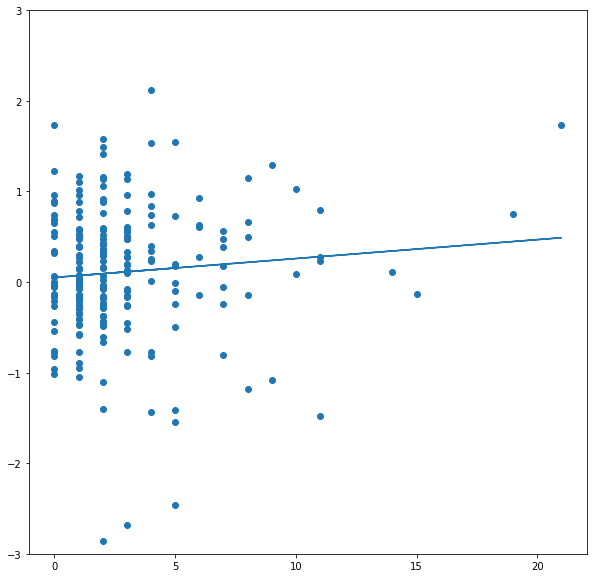

In [9]:
c = result_['아이폰'].values.reshape(-1,1)
line_fitter = LinearRegression()
line_fitter.fit(c, result_['Price'])

plt.figure(figsize = (10, 10))
plt.ylim(-3, 3)
plt.scatter(result_['아이폰'], result_['Price'])
plt.plot(result_['아이폰'], line_fitter.predict(c))

In [10]:
line_fitter.coef_

array([0.02087916])